In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df_credit_card = pd.read_csv("creditcard.csv")

In [3]:
df_credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In the data cleanup phase, PCA was already done on the dataset to remove all correlation between features (as evidenced by the correlation matrix below). Therefore, there's not much transformation for me to do or features to add. Also, this is going to be a black box in terms of what features are useful.

In [4]:
df_credit_card.Class.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

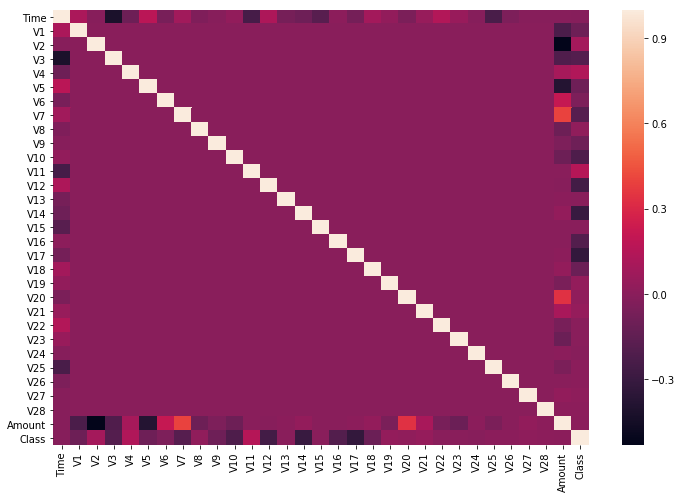

In [5]:
corr = df_credit_card.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_credit_card['s_Amount'] = scaler.fit_transform(df_credit_card[['Amount']])

In [7]:
X = df_credit_card.drop(['Class','Amount'],1)
Y = df_credit_card['Class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.2)

In [9]:
# notes: sklearn.f1_score , weight precision and recall
# for roc_auc score predict off of X and then input into roc_auc score

### Support vector binary classifier

In [10]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
svc.score(X_test,y_test)

0.9980162213405428

In [12]:
cross_val_score(svc, X_test, y_test, cv=5)

array([0.99798122, 0.99806899, 0.99798122, 0.9981566 , 0.99806865])

In [13]:
#predict values on test set and then look at f1 score
y_pred = svc.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9970253168320903

In [14]:
roc_auc_score(y_test,y_pred)

0.5

### Random forest classifier

In [15]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9992977774656788

In [16]:
cross_val_score(rfc, X_test, y_test, cv=5)

array([0.99912227, 0.99947336, 0.99956113, 0.99894663, 0.99947327])

In [17]:
#predict values on test set and then look at f1 score
y_pred = rfc.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.9992399609966448

In [18]:
#predict values on test set and then look at roc_auc score
roc_auc_score(y_test,y_pred)

0.8406727836838997

In [19]:
#create roc curve prior to graphing
from sklearn.metrics import roc_curve, auc
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

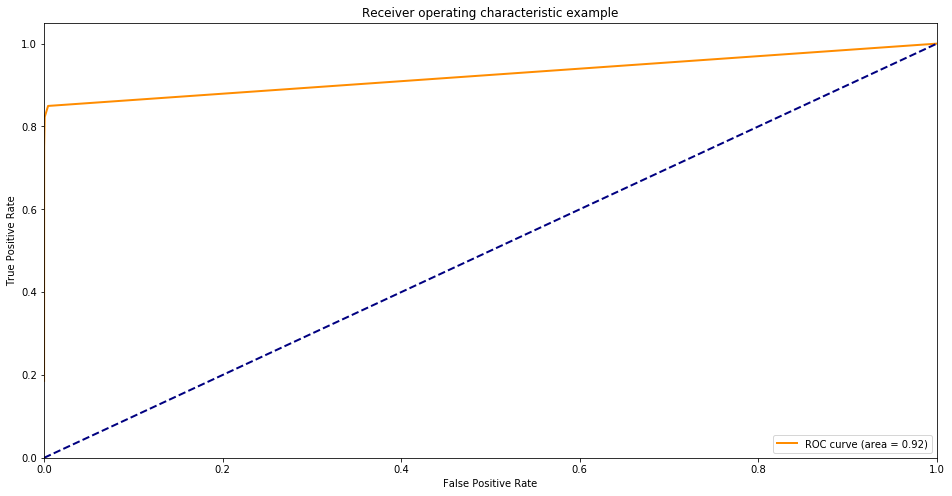

In [20]:
# graph roc_curve
plt.figure(figsize=(16,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The RandomForestClassifier works much better than the SVC in this case. Also, with SVC and time/resource constraints, I was only able to train and test on 20% of the data each. This didn't seem to affect the accuracy scores much, but it did negatively affect the ROC-AUC score. Running the random forest classifier on 50% of the data yielded a higher ROC-AUC score. In the end, the better model for this dataset is the random forest rather than SVC.

In [21]:
# statsmodels.graphics.regressionplots.influence_plot¶
# use to see if by removing outlier on training set, how much affects score on test set